#### GISC 420 T1 2022
# **Assignment 3**
Corvin Idler,  ID 300598312

In [1]:
## Assemble all the code needed to do the processing in this cell
## Make sure to comment your code, so I can tell what you think you are doing
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas

## --------------------------------------------------------------------------
## Initialise the dictionary here:
## --------------------------------------------------------------------------
#land use class dictionary. I opted for using a single dictionary. Obviously only works if the codes are disjunct (non-overlapping)
lu_codes= {'1': 'Arable', '2': 'Arable', '3': 'Arable', '4': 'Arable', '5': 'Non-Arable', '6': 'Non-Arable', '7': 'Non-Arable', '8': 'Protected',
          'c': 'Climate', 'e': 'Erosion', 's': 'Soil', 'w': 'Wetness','estu': 'Estuary', 'ice': 'Ice', 'lake': 'Lake', 'quar': 'Quarries/mines', 'rive': 'River', 'town': 'Town/urban'}


# --------------------------------------------------------------------------
## Provide function definition here:
## --------------------------------------------------------------------------
#function takes string code and extraction position as parameters
def luc_recode(code,pos):
    #first we check if the whole code is a match in the dictionatry (as is the case for the non-normal land types)
    if code in lu_codes:
        #if whole code is a match with a dictionary key, we return the value
        return lu_codes[code]
    #if not, we check if the extraction position is within the boundaries of the string code.
    #this is needed to filter out the cases where we try to extract "sub-dominant" codes that are not present 
    elif pos<len(code):
        #we check if the extraction position is related to one of the two two digit suitability classes
        if (pos !=2 and pos !=7):
            #if not, just do a normal dictionary look up (for LU class and LU limitation)
            return lu_codes[code[pos]]
        else:
            #extraction position related to two digit suitability classes, so need to extract two positions
            return code[pos]+code[pos+1]
    else:
        #this branch is in case we try to extract sub-dominant LU information that isn't present
        return None

#Constants to represent the (starting) position of various bits of information in the LUC code
DOM_LANDUSE_CLASS=0
DOM_LANDUSE_LIMITATION=1
DOM_LANDUSE_SUITABILITY=2
SUBDOM_LANDUSE_CLASS=5
SUBDOM_LANDUSE_LIMITATION=6
SUBDOM_LANDUSE_SUITABILITY=7


## --------------------------------------------------------------------------
## And now run the code
## --------------------------------------------------------------------------

# Start by reading the data (using file paths that work with the GISC 420 binder image)
d = geopandas.read_file('labs/dictionaries/wairarapa_s_hawkes_bay.geojson')

#running the luc_recode function on each of the six possible parts of the LUC code
#and store the result in a corresponding column each time
d['DOM_LUCLASS'] = d.LUC.apply(luc_recode,pos=DOM_LANDUSE_CLASS)
d['DOM_LULIMIT'] = d.LUC.apply(luc_recode,pos=DOM_LANDUSE_LIMITATION)
d['DOM_LUSUIT'] = d.LUC.apply(luc_recode,pos=DOM_LANDUSE_SUITABILITY)
d['SUBDOM_LUCLASS'] = d.LUC.apply(luc_recode,pos=SUBDOM_LANDUSE_CLASS)
d['SUBDOM_LULIMIT'] = d.LUC.apply(luc_recode,pos=SUBDOM_LANDUSE_LIMITATION)
d['SUBDOM_LUSUIT'] = d.LUC.apply(luc_recode,pos=SUBDOM_LANDUSE_SUITABILITY)

<AxesSubplot:>

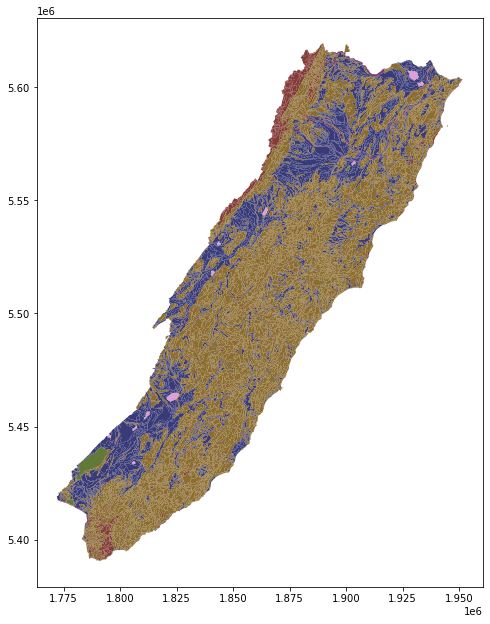

In [2]:
#Plotting a map with just the LU class attribute

fig = pyplot.figure(figsize=(8,11))
ax1 = fig.add_subplot(111)
d.plot(ax=ax1, column='DOM_LUCLASS', cmap='tab20b')

In [3]:
#sanity check that I covered the sub dominant information well (there are only very few cases.. so had to filter it down to check)
d[d.LUC.str.find("+") != -1].head()

,LUC,ROCK,SOIL,geometry,DOM_LUCLASS,DOM_LULIMIT,DOM_LUSUIT,SUBDOM_LUCLASS,SUBDOM_LULIMIT,SUBDOM_LUSUIT
295,3e 2+7e 4,(Lo)/Us+Gr,b28 +21B +15B,"MULTIPOLYGON (((1947815.757 5602935.034, 19476...",Arable,Erosion,2,Non-Arable,Erosion,4
314,3e 2+7e 4,(Lo)/Us+Gr,b28 +21B +15B,"MULTIPOLYGON (((1944722.531 5602989.335, 19447...",Arable,Erosion,2,Non-Arable,Erosion,4
390,7e 9+4s 1,Gr,b35,"MULTIPOLYGON (((1895989.235 5600054.428, 18960...",Non-Arable,Erosion,9,Arable,Soil,1
735,8e 1+3s 2,Gr/Sm+Al,b35 +58A,"MULTIPOLYGON (((1882134.882 5590543.083, 18822...",Protected,Erosion,1,Arable,Soil,2
972,3e 3+4e 3,Mj,b26B +24,"MULTIPOLYGON (((1928076.898 5582994.218, 19281...",Arable,Erosion,3,Arable,Erosion,3


## Submission commentary


The main challange in the assignement was the software engineering decision about creating 6 small functions (with partially redundant code) vs. one large function (with more logic inside the function). The same goes for the dictionary.

I could see merit in both approaches. Using 6 small functions as well as 3 dictionaries might be easier to read and understand.
I felt a single function on the other hand might be easier to maintain (and slightly fewer lines of code).

A second reason I wanted to write a single function was to challange myself a bit, as it took a bit more thinking and trial and error.
Hope that's ok.

## Comments
No complaints from me on challenging yourself to write the more complicated function! And it's still pretty clean and readable. You could, now you know about objects, think about making it into a `Decoder` class and hiding the character positions as attributes of the class:

    class LUCDecoder:
        DOM_LANDUSE_CLASS=0
        DOM_LANDUSE_LIMITATION=1
        DOM_LANDUSE_SUITABILITY=2
        SUBDOM_LANDUSE_CLASS=5
        SUBDOM_LANDUSE_LIMITATION=6
        SUBDOM_LANDUSE_SUITABILITY=7
        
        def __init__(self):
            pass
            
        def decode(self, code, pos):
            ...
            
   and then to use you'd have
   
       decoder = LUCDecoder()
       value = decoder.decode(code, pos)
       

Good work.

**A+**
  